# INFO 2950 Project

Robin Ahn, Yama Bazger, Grace Myers, and Kaylah Nicholson (ordered alphabetically by last name)

**This will serve as a preliminary Jupyter drawing board for our project** 

Create sections and cells as needed



## Section 1
Firstly, we will import all the relevant libraries that will help us with our data analysis here.



In [178]:
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import duckdb 


We will now import the CSV files that we will be processing. GEO-JSON FILE NEED TO BE DESCRIBED

In [125]:
korea_purpose = pd.read_csv("/Users/yamabazger/Documents/GitHub/info2950-repo/Korea_Visitors_By_Purpose-final.csv")
korea_gender = pd.read_csv("/Users/yamabazger/Documents/GitHub/info2950-repo/Korea_Visitors_By_Gender-final.csv")
world_map = gpd.read_file("/Users/yamabazger/Documents/GitHub/info2950-repo/world.geo.json")

The original CSV files contained white spaces in some columns with string types. We will strip the white spaces for consistency and to have a more polished sets of data to work with.

In [126]:
#Stripping whitespaces for columns 'Continents', 'Country', and 'Purpose'
#for korea_purpose
korea_purpose['Continents'] = korea_purpose['Continents'].str.strip()
korea_purpose['Country'] = korea_purpose['Country'].str.strip()
korea_purpose['Purpose'] = korea_purpose['Purpose'].str.strip()

#Stripping whitespaces for columns 'Continents', 'Country', and 'Gender'
#for korea_gender
korea_gender['Continents'] = korea_gender['Continents'].str.strip()
korea_gender['Country'] = korea_gender['Country'].str.strip()
korea_gender['Gender'] = korea_gender['Gender'].str.strip()

We will check the initial shape of korea_purpose.

In [127]:
korea_purpose.shape

(37542, 7)

We will do some initially cleaning of the data, such as removing rows that contain terms "etc".... under Country. ROBIN/GRACE, look at the code and complete the description.

In [128]:
# Define the conditions for each column using index locations
condition_date = (korea_purpose.iloc[:, 0] == 'sum')  
condition_continent = korea_purpose.iloc[:, 1].isin(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 1 for 'Continent'
condition_country_name = korea_purpose.iloc[:, 2].isin(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 2 for 'Country name'
condition_purpose = korea_purpose.iloc[:, 3].isin(['entire'])

#Rows marked for deletion
rows_to_remove = korea_purpose[condition_date | condition_continent | condition_country_name | condition_purpose].index

#Now the actual deletion
korea_purpose = korea_purpose.drop(rows_to_remove)

In [129]:
country_mapping = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'vietnam': 'Vietnam',
    'brazil': 'Brazil',
    'malaysia': 'Malaysia',
    # Add more mappings as needed
}

# Standardize country names in the 'korea_purpose' dataframe
korea_purpose['Country'] = korea_purpose['Country'].replace(country_mapping)

In [130]:
country_mapping_gender = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'vietnam': 'Vietnam',
    'Swiss': 'Switzerland',
    'malaysia': 'Malaysia',
    'Republic of South Africa': 'South Africa'
    # Add more mappings as needed
}

# Standardize country names in the 'korea_gender' dataframe
korea_gender['Country'] = korea_gender['Country'].replace(country_mapping_gender)

Now that we have deleted some. unknown number of rows, we will check the shape of korea_purpose to ensure the number of rows has decreased.

In [131]:
korea_purpose.shape

(24380, 7)

In [132]:
korea_gender.head()

,Date,Continents,Country,Gender,Visitors,Visitors Same Period Previous Year,Growth
0,201601,Oceania,Australia,male,5295,5402,-2.0
1,201601,Oceania,Australia,female,4414,4379,0.8
2,201601,Oceania,Australia,Stewardess,271,216,25.5
3,201601,Oceania,Australia,entire,9980,9997,-0.2
4,201602,Oceania,Australia,male,4239,3972,6.7


We will repeat the same process with korea_gender.

In [133]:
korea_gender.shape

(25024, 7)

In [134]:
# Define the conditions for each column using index locations
condition_date = (korea_gender.iloc[:, 0] == 'sum')  # Using index 0 for 'Base date'
condition_continent = korea_gender.iloc[:, 1].isin(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 1 for 'Continent'
condition_country_name = korea_gender.iloc[:, 2].isin(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 2 for 'Country name'
condition_purpose = korea_gender.iloc[:, 3].isin(['Stewardess', 'entire'])

#Rows marked for deletion
rows_to_remove = korea_gender[condition_date | condition_continent | condition_country_name | condition_purpose].index

#Now the actual deletion
korea_gender = korea_gender.drop(rows_to_remove)

In [135]:
korea_gender.shape

(9752, 7)

In [136]:

korea_purpose['Growth'].dtype #Make a comment and create a code cell to describe and show the datatype of Growth and the issue with it


dtype('O')

In korea_purpose, the Growth column had datapoints that contains "_". The underscore in the original dataset in Korean is actually a comma (e.g. "2_550.0" is really "2,550.0"). Either way, this inteferes with our data processing as we want the column data type to be a float. 

Here, we will fix this by first changing every element under Growth to a string, and then, we will replace the underscore with a comma. 

In [137]:

# Replace underscores with a blank ""
korea_purpose['Growth'] = korea_purpose['Growth'].astype(str).str.replace('_', '')

# Convert the column back to float type
korea_purpose['Growth'] = korea_purpose['Growth'].astype(float)


To confirm the change has been made, we check the datatype of the Growth columnb again.

In [138]:
korea_purpose['Growth'].dtype

dtype('float64')

We change the date format for both dataframes to facilitate easier data processing 

In [139]:
korea_purpose['Date'] = pd.to_datetime(korea_purpose['Date'], format='%Y%m')
korea_gender['Date'] = pd.to_datetime(korea_gender['Date'], format='%Y%m')

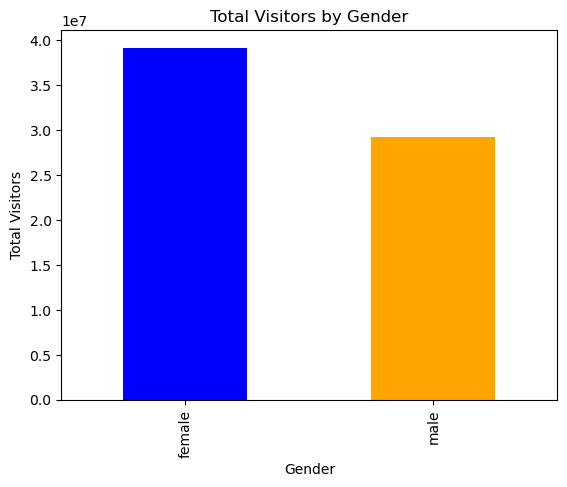

,Date,Continents,Country,Purpose,Visitors,Visitors Same Period Previous Year,Growth
12,2016-01-01,Asia,China,tourism,456636.0,327225.0,39.5
13,2016-01-01,Asia,China,commercial,3723.0,4310.0,-13.6
14,2016-01-01,Asia,China,Public,140.0,165.0,-15.2
15,2016-01-01,Asia,China,Study Abroad,4383.0,3778.0,16.0
16,2016-01-01,Asia,China,etc,57099.0,58867.0,-3.0
...,...,...,...,...,...,...,...
37476,2023-08-01,Oceania,Australia,tourism,10561.0,3891.0,171.4
37477,2023-08-01,Oceania,Australia,commercial,47.0,87.0,-46.0
37478,2023-08-01,Oceania,Australia,Public,69.0,34.0,102.9
37479,2023-08-01,Oceania,Australia,Study Abroad,108.0,109.0,-0.9


In [140]:
total_visitors_by_gender = korea_gender.groupby('Gender')['Visitors'].sum()
# Create a bar plot
total_visitors_by_gender.plot(kind='bar', color=['blue', 'orange'])

# Add title and labels
plt.title('Total Visitors by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Visitors')

# Show the plot
plt.show()
korea_purpose.head(-10)

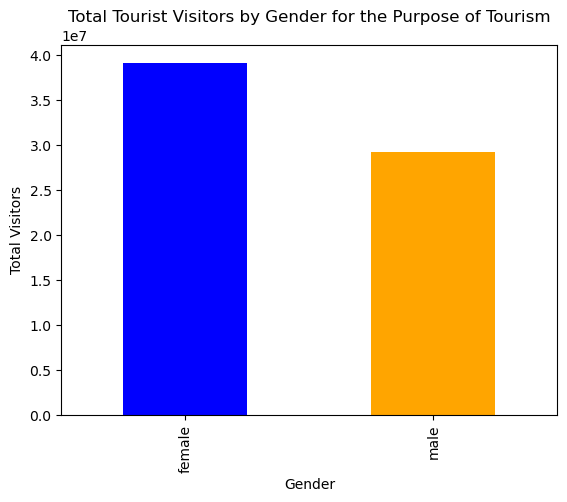

['Australia', 'Austria', 'Bangladesh', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'China', 'Croatia', 'Denmark', 'France', 'GCC', 'Germany', 'Greece', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Macau', 'Malaysia', 'Mexico', 'Mongolia', 'Myanmar', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Spain', 'Sri Lanka', 'Sweden', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom', 'Ukraine', 'United States of America', 'Uzbekistan', 'Vietnam', 'Finland']


51

In [141]:
merged_data = pd.merge(korea_gender, korea_purpose, on=['Date', 'Continents', 'Country'])

# Filter the merged data based on the 'Purpose' column
tourism_data = merged_data[merged_data['Purpose'] == 'tourism']

# Group the filtered data by 'Gender' and sum the 'Visitors' column
total_tourist_visitors_by_gender = tourism_data.groupby('Gender')['Visitors_x'].sum()

# Create a bar plot
total_tourist_visitors_by_gender.plot(kind='bar', color=['blue', 'orange'])

# Add title and labels
plt.title('Total Tourist Visitors by Gender for the Purpose of Tourism')
plt.xlabel('Gender')
plt.ylabel('Total Visitors')

# Show the plot
plt.show()

country_list = []
for i in merged_data['Country']:
    if i not in country_list:
        country_list.append(i)
        
print(country_list)
len(country_list)


/Users/yamabazger/anaconda3/envs/info2950/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


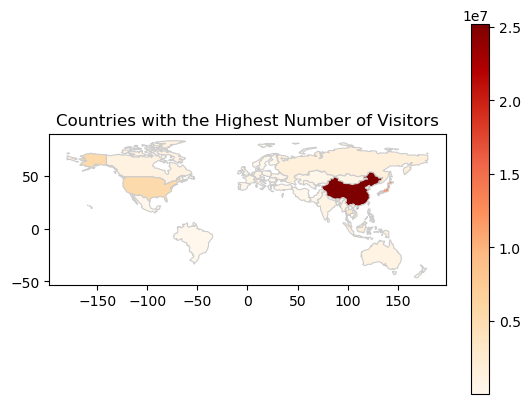

Displayed Countries:
['Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Indonesia', 'Russia', 'Norway', 'Mexico', 'Brazil', 'France', 'Israel', 'Cambodia', 'Thailand', 'Myanmar', 'Vietnam', 'Mongolia', 'India', 'Bangladesh', 'Pakistan', 'Iran', 'Sweden', 'Ukraine', 'Poland', 'Austria', 'Romania', 'Germany', 'Bulgaria', 'Greece', 'Turkey', 'Croatia', 'Belgium', 'Netherlands', 'Portugal', 'Spain', 'Ireland', 'New Zealand', 'Australia', 'Sri Lanka', 'China', 'Taiwan', 'Italy', 'Denmark', 'United Kingdom', 'Philippines', 'Malaysia', 'Finland', 'Japan']


47

In [142]:
# Read the world map data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the world map with your dataframes
merged_data = world.merge(korea_purpose, left_on='name', right_on='Country')

# Calculate the total visitors for each country
country_visitors = merged_data.groupby('name')['Visitors'].sum().reset_index()

# Merge the visitor data with the world map data
final_map_data = world.merge(country_visitors, left_on='name', right_on='name')

# Create a choropleth map
fig, ax = plt.subplots(1, 1)
final_map_data.plot(column='Visitors', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Countries with the Highest Number of Visitors')

# Show the plot
plt.show()
displayed_countries = list(final_map_data['name'])
print("Displayed Countries:")
print(displayed_countries)
len(displayed_countries)

(array([16436., 16801., 17167., 17532., 17897., 18262., 18628., 18993.,
        19358.]),
 [Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

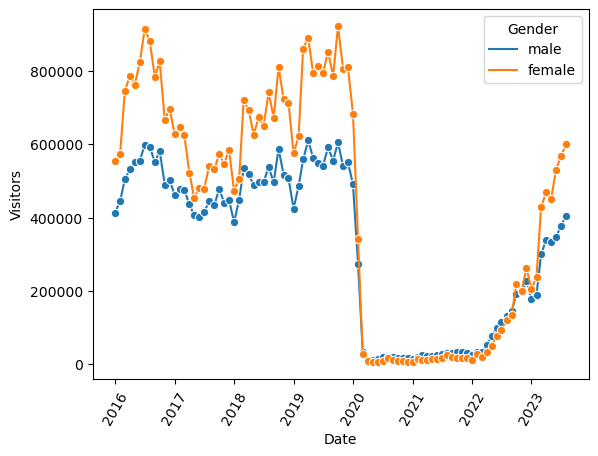

In [201]:
total_visitors_by_gender = duckdb.sql("SELECT Date, Gender, SUM(Visitors) as Visitors FROM korea_gender GROUP BY Date, Gender").df()
total_visitors_by_gender = sns.lineplot( data=total_visitors_by_gender, x="Date", y="Visitors", hue="Gender", marker="o")
plt.xticks(rotation=60)


In [22]:
korea_purpose.head()

,Date,Continents,Country,Purpose,Visitors,Visitors Same Period Previous Year,Growth
12,2016-01-01,Asia,China,tourism,456636.0,327225.0,39.5
13,2016-01-01,Asia,China,commercial,3723.0,4310.0,-13.6
14,2016-01-01,Asia,China,Public,140.0,165.0,-15.2
15,2016-01-01,Asia,China,Study Abroad,4383.0,3778.0,16.0
16,2016-01-01,Asia,China,etc,57099.0,58867.0,-3.0


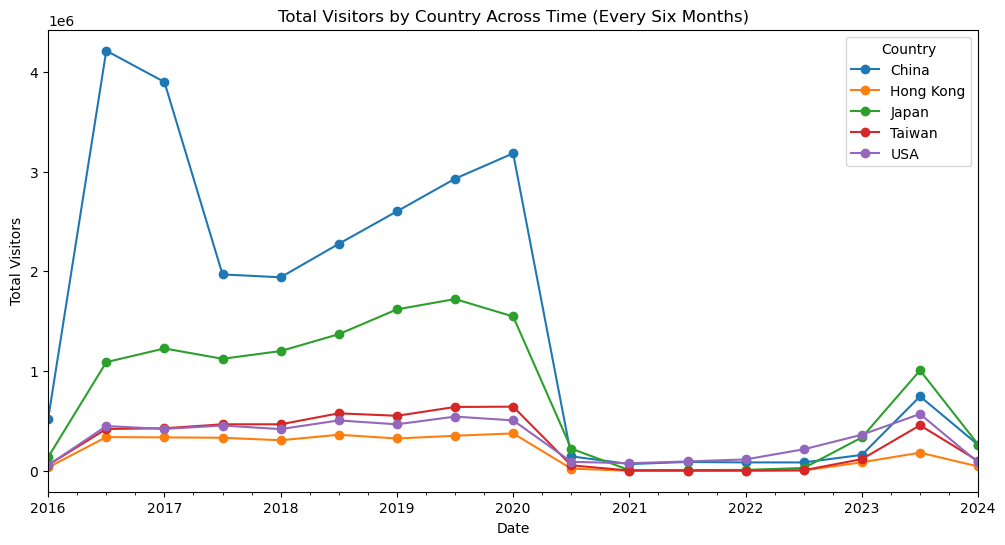

In [23]:
total_visitors_country = korea_purpose.groupby('Country')['Visitors'].sum()

# Select top 5 countries
top_5_countries = total_visitors_country.nlargest(5).index

# Filter the data for the top 5 countries
df_top_5 = korea_purpose[korea_purpose['Country'].isin(top_5_countries)]

# Group the data by 'Country' and 'Date' with six-month intervals and calculate the total visitors for each group
total_visitors_country_time = df_top_5.groupby(['Country', pd.Grouper(key='Date', freq='6M')])['Visitors'].sum().unstack(level=0)

# Plot the data
ax = total_visitors_country_time.plot(kind='line', marker='o', figsize=(12, 6))

# Add title and labels
plt.title('Total Visitors by Country Across Time (Every Six Months)')
plt.xlabel('Date')
plt.ylabel('Total Visitors')

# Show the plot
plt.show()

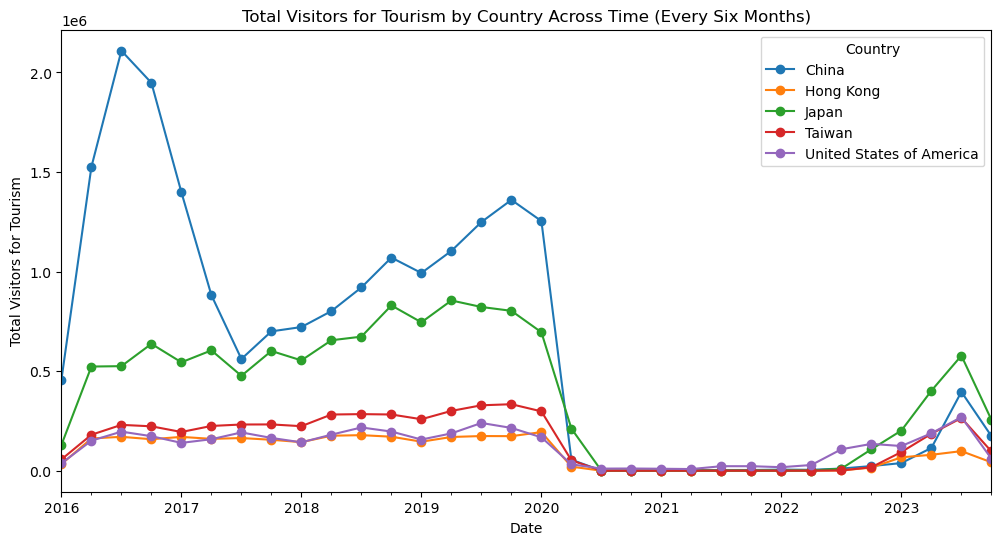

In [160]:
# Filter the data for the purpose of 'tourism'
korea_purpose_tourism = korea_purpose[korea_purpose['Purpose'] == 'tourism']

# Compute total visitors for each country with the purpose of tourism
total_visitors_country_tourism = korea_purpose_tourism.groupby('Country')['Visitors'].sum()

# Select top 5 countries
top_5_countries_tourism = total_visitors_country_tourism.nlargest(5).index

# Filter the data for the top 5 countries
korea_purpose_top_5_tourism = korea_purpose_tourism[korea_purpose_tourism['Country'].isin(top_5_countries_tourism)]

# Group the data by 'Country' and 'Date' with six-month intervals and calculate the total visitors for each group
total_visitors_country_time_tourism = korea_purpose_top_5_tourism.groupby(['Country', pd.Grouper(key='Date', freq='3M')])['Visitors'].sum().unstack(level=0)

# Plot the data
ax = total_visitors_country_time_tourism.plot(kind='line', marker='o', figsize=(12, 6))

# Add title and labels
plt.title('Total Visitors for Tourism by Country Across Time (Every Six Months)')
plt.xlabel('Date')
plt.ylabel('Total Visitors for Tourism')

# Show the plot
plt.show()

In [173]:
merged_df = pd.merge(korea_purpose, korea_gender, on=['Date', 'Continents', 'Country'])

# You can also specify the 'how' parameter to specify the type of merge (inner, outer, left, or right)
# For example:
# merged_df = pd.merge(korea_purpose, korea_gender, on='common_column', how='inner')

# Display the merged DataFrame


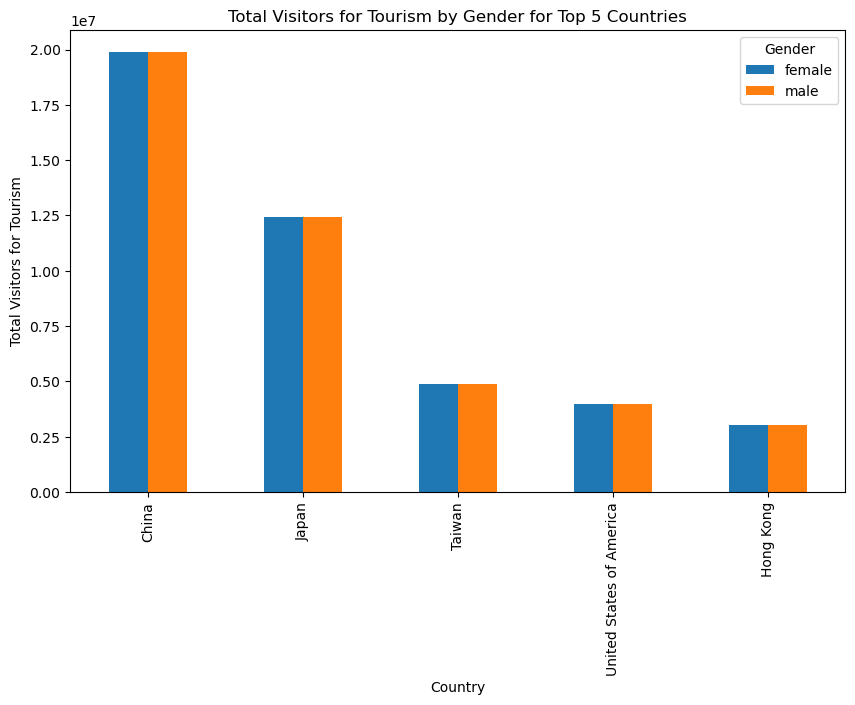

In [162]:
# Filter the data for the purpose of 'tourism'
merged_df_tourism = merged_df[merged_df['Purpose'] == 'tourism']

# Compute total visitors for tourism by gender and country
total_visitors_tourism_gender_country = merged_df_tourism.groupby(['Country', 'Gender'])['Visitors_x'].sum().unstack()

# Select top 5 countries based on total visitors for tourism
top_5_countries_tourism = total_visitors_tourism_gender_country.sum(axis=1).nlargest(5).index

# Filter the data for the top 5 countries
total_visitors_tourism_gender_country_top5 = total_visitors_tourism_gender_country.loc[top_5_countries_tourism]

# Plot the data
total_visitors_tourism_gender_country_top5.plot(kind='bar', figsize=(10, 6))
plt.title('Total Visitors for Tourism by Gender for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Visitors for Tourism')
plt.show()

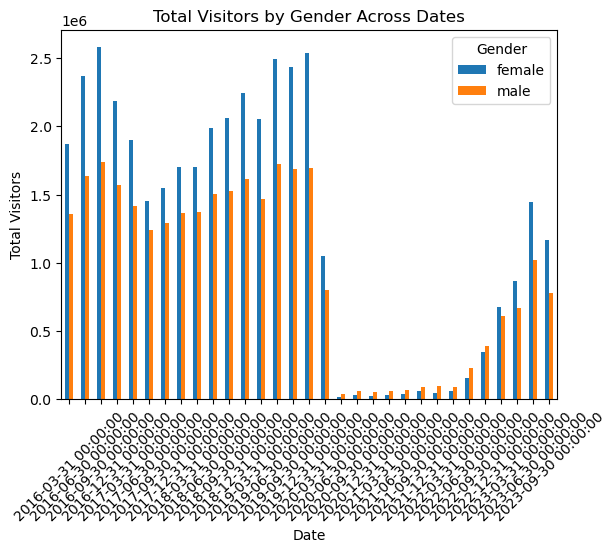

In [163]:
# Group by 'Date' and 'Gender', and calculate the sum of 'Visitors'
total_visitors_date_gender = korea_gender.groupby(['Date', 'Gender'])['Visitors'].sum().unstack()

# Resample the data to quarterly frequency
total_visitors_date_gender = total_visitors_date_gender.resample('Q').sum()

# Plot the data
total_visitors_date_gender.plot(kind='bar')

# Add title and labels
plt.title('Total Visitors by Gender Across Dates')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [180]:
#selects the relevant columns of the data, and adds a column to represent the respective country,
#returns the resulting dataframe
filelocation = "/Users/yamabazger/Documents/GitHub/info2950-repo/kpop_youtube_data/"
abbrv = "/Users/yamabazger/Documents/GitHub/info2950-repo/"
def add_column(abbrv, country):
    '''
    Param abbrv: string of the file's abbreviation
    Param country: string of the country's name
    '''
    
    df = pd.read_csv(filelocation+abbrv+'_youtube_trending_data.csv') 
    country_df = duckdb.sql("SELECT publishedAt, \
                       trending_date, tags, view_count, likes, \
                       comment_count \
                       FROM df \
                       WHERE CONTAINS(tags, 'k-pop')").df()
    country_df.insert(0, 'country', country) 
    return country_df

In [181]:
brazil_df = add_column('BR', 'Brazil')
brazil_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Brazil,2020-08-08T15:00:09Z,2020-08-12T00:00:00Z,Now United|Nowunited|New united|one united|now...,2758839,398873,52794
1,Brazil,2020-08-08T15:00:09Z,2020-08-13T00:00:00Z,Now United|Nowunited|New united|one united|now...,2959250,408147,55230
2,Brazil,2020-08-08T15:00:09Z,2020-08-14T00:00:00Z,Now United|Nowunited|New united|one united|now...,3141869,416039,57177
3,Brazil,2020-08-08T15:00:09Z,2020-08-15T00:00:00Z,Now United|Nowunited|New united|one united|now...,3332933,423114,58442
4,Brazil,2020-08-22T15:00:04Z,2020-08-23T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,293112,96361,5060
...,...,...,...,...,...,...,...
589,Brazil,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280621,36848
590,Brazil,2023-10-01T10:00:49Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4948845,569229,14871
591,Brazil,2023-10-03T11:00:03Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,1539027,303838,6167
592,Brazil,2023-10-01T10:00:49Z,2023-10-09T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,5250099,576088,14954


In [182]:
canada_df = add_column('CA', 'Canada')
canada_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Canada,2020-08-23T15:00:04Z,2020-08-25T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,771222,163897,6265
1,Canada,2020-08-23T15:00:04Z,2020-08-26T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,925765,177870,6669
2,Canada,2020-08-26T09:00:03Z,2020-08-27T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,2686150,583104,75607
3,Canada,2020-08-23T15:00:04Z,2020-08-27T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,988255,180557,6720
4,Canada,2020-08-26T09:00:03Z,2020-08-28T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,3921828,673702,89466
...,...,...,...,...,...,...,...
502,Canada,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
503,Canada,2023-10-01T10:00:49Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4568967,559630,14743
504,Canada,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280617,36848
505,Canada,2023-10-01T10:00:49Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4948845,569228,14871


In [183]:
denmark_df = add_column('DE', 'Denmark')
denmark_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Denmark,2020-08-22T03:16:24Z,2020-08-23T00:00:00Z,Yam Haus|Yam House|yam|house|haus|yamhaus|yamh...,396059,35198,1675
1,Denmark,2020-08-22T03:16:24Z,2020-08-24T00:00:00Z,Yam Haus|Yam House|yam|house|haus|yamhaus|yamh...,535326,43643,2026
2,Denmark,2020-08-24T15:00:03Z,2020-08-25T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,466695,127829,5153
3,Denmark,2020-08-22T03:16:24Z,2020-08-25T00:00:00Z,Yam Haus|Yam House|yam|house|haus|yamhaus|yamh...,609665,47988,2177
4,Denmark,2020-08-24T15:00:03Z,2020-08-26T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,601327,143866,5672
...,...,...,...,...,...,...,...
396,Denmark,2023-09-30T04:00:04Z,2023-10-05T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,9660414,1213906,35751
397,Denmark,2023-10-01T10:00:49Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4149421,547542,14610
398,Denmark,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
399,Denmark,2023-10-01T10:00:49Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4568967,559631,14743


In [184]:
france_df = add_column('FR', 'France')
france_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,France,2020-08-22T15:00:04Z,2020-08-23T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,293112,96355,5058
1,France,2020-08-23T15:00:04Z,2020-08-24T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,514015,132631,5591
2,France,2020-08-22T15:00:04Z,2020-08-24T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,419519,116663,5528
3,France,2020-08-24T15:00:03Z,2020-08-25T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,466695,127833,5153
4,France,2020-08-23T15:00:04Z,2020-08-25T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,771222,163899,6265
...,...,...,...,...,...,...,...
404,France,2023-09-30T04:00:04Z,2023-10-05T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,9660414,1213906,35751
405,France,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
406,France,2023-10-01T10:00:49Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4149421,547542,14610
407,France,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280617,36848


In [185]:
india_df = add_column('IN', 'India')
india_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,India,2020-10-06T00:00:00Z,2020-10-06T00:00:00Z,Blackpink|documentary|doc|movie|film|netflix|l...,583274,83990,2944
1,India,2020-10-06T00:00:00Z,2020-10-07T00:00:00Z,Blackpink|documentary|doc|movie|film|netflix|l...,939336,105654,3659
2,India,2020-10-06T00:00:00Z,2020-10-08T00:00:00Z,Blackpink|documentary|doc|movie|film|netflix|l...,1106212,115692,3951
3,India,2020-10-06T00:00:00Z,2020-10-09T00:00:00Z,Blackpink|documentary|doc|movie|film|netflix|l...,1199617,122501,4121
4,India,2020-11-24T00:00:42Z,2020-11-24T00:00:00Z,bts|dynamite|gma3|k-pop|hit|song|sensation|mus...,998725,151307,5180
...,...,...,...,...,...,...,...
198,India,2023-09-30T04:00:04Z,2023-10-01T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,5238967,982020,31443
199,India,2023-09-30T04:00:04Z,2023-10-02T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,6883047,1092636,33718
200,India,2023-09-30T04:00:04Z,2023-10-03T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,7846782,1140809,34573
201,India,2023-09-30T04:00:04Z,2023-10-04T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,8667857,1176016,35248


In [186]:
japan_df = add_column('JP', 'Japan')
japan_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Japan,2020-08-22T09:00:01Z,2020-08-23T00:00:00Z,niziu|NiziU|Makeyouhappy|make you happy|JYP|So...,1735633,121391,4997
1,Japan,2020-08-22T09:00:01Z,2020-08-24T00:00:00Z,niziu|NiziU|Makeyouhappy|make you happy|JYP|So...,2205755,138604,5419
2,Japan,2020-08-22T09:00:01Z,2020-08-26T00:00:00Z,niziu|NiziU|Makeyouhappy|make you happy|JYP|So...,2746709,158699,5847
3,Japan,2020-08-22T09:00:01Z,2020-08-27T00:00:00Z,niziu|NiziU|Makeyouhappy|make you happy|JYP|So...,2902122,162190,5963
4,Japan,2020-08-22T09:00:01Z,2020-08-28T00:00:00Z,niziu|NiziU|Makeyouhappy|make you happy|JYP|So...,3038610,164848,6031
...,...,...,...,...,...,...,...
1003,Japan,2023-09-30T04:00:04Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,12429550,1305799,37244
1004,Japan,2023-09-30T04:00:04Z,2023-10-09T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,13081170,1324165,37543
1005,Japan,2023-09-30T04:00:04Z,2023-10-10T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,13676938,1339863,37865
1006,Japan,2023-09-30T04:00:04Z,2023-10-11T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,14201417,1353736,38118


In [187]:
mexico_df = add_column('MX', 'Mexico')
mexico_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Mexico,2020-08-14T04:00:12Z,2020-08-18T00:00:00Z,하이라인|highline|하이라인엔터테인먼트|mv|teaser|원호|wonho|we...,1749223,366070,44659
1,Mexico,2020-08-14T04:00:12Z,2020-08-19T00:00:00Z,하이라인|highline|하이라인엔터테인먼트|mv|teaser|원호|wonho|we...,1891479,385543,45861
2,Mexico,2020-08-14T04:00:12Z,2020-08-20T00:00:00Z,하이라인|highline|하이라인엔터테인먼트|mv|teaser|원호|wonho|we...,2006028,397182,46702
3,Mexico,2020-08-22T15:00:04Z,2020-08-23T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,293112,96366,5060
4,Mexico,2020-08-23T15:00:04Z,2020-08-24T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,514015,132642,5593
...,...,...,...,...,...,...,...
952,Mexico,2023-09-30T04:00:04Z,2023-10-10T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,13676938,1339863,37865
953,Mexico,2023-10-01T10:00:49Z,2023-10-11T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,5676025,587186,15151
954,Mexico,2023-09-30T04:00:04Z,2023-10-11T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,14201417,1353736,38118
955,Mexico,2023-10-01T10:00:49Z,2023-10-12T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,5875446,591613,15227


In [188]:
russia_df = add_column('RU', 'Russia')
russia_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Russia,2020-08-12T09:00:50Z,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,2771
1,Russia,2020-08-12T09:00:50Z,2020-08-13T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,720672,96035,3523
2,Russia,2020-08-12T09:00:50Z,2020-08-14T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,826963,105443,3703
3,Russia,2020-08-22T15:00:04Z,2020-08-23T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,293112,96360,5057
4,Russia,2020-08-23T15:00:04Z,2020-08-24T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,514015,132638,5593
...,...,...,...,...,...,...,...
239,Russia,2023-09-30T04:00:04Z,2023-09-30T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,2133364,610193,21520
240,Russia,2023-09-30T04:00:04Z,2023-10-01T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,5240794,982038,31443
241,Russia,2023-10-01T10:00:49Z,2023-10-02T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,2224282,443918,13121
242,Russia,2023-09-30T04:00:04Z,2023-10-02T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,6883047,1092643,33718


In [189]:
united_states_df = add_column('US', 'US')
united_states_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,US,2020-08-26T09:00:03Z,2020-08-27T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,2686150,583088,75623
1,US,2020-08-28T05:52:01Z,2020-08-29T00:00:00Z,#brisxlife|yg entertainment|yg|와이지|k-pop|black...,771910,62820,3716
2,US,2020-08-26T09:00:03Z,2020-08-29T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,4853474,716829,94922
3,US,2020-08-28T05:52:01Z,2020-08-30T00:00:00Z,#brisxlife|yg entertainment|yg|와이지|k-pop|black...,896932,68341,4061
4,US,2020-08-26T09:00:03Z,2020-08-30T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,5260779,733597,99649
...,...,...,...,...,...,...,...
494,US,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
495,US,2023-10-01T10:00:49Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4568967,559630,14743
496,US,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280617,36848
497,US,2023-10-01T10:00:49Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4948845,569228,14871


In [190]:
united_kingdom_df = add_column('GB', 'UK')
united_kingdom_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,UK,2020-08-26T09:00:03Z,2020-08-27T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,2686150,583091,75604
1,UK,2020-08-26T09:00:03Z,2020-08-28T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,3921828,673695,89454
2,UK,2020-08-28T05:52:01Z,2020-08-29T00:00:00Z,#brisxlife|yg entertainment|yg|와이지|k-pop|black...,771910,62820,3713
3,UK,2020-08-26T09:00:03Z,2020-08-29T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,4853474,716829,94922
4,UK,2020-08-28T05:52:01Z,2020-08-30T00:00:00Z,#brisxlife|yg entertainment|yg|와이지|k-pop|black...,896932,68341,4062
...,...,...,...,...,...,...,...
423,UK,2023-10-01T10:00:49Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4149421,547542,14610
424,UK,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
425,UK,2023-10-01T10:00:49Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4568967,559630,14743
426,UK,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280617,36848


In [191]:
combined_df = duckdb.sql("SELECT * FROM brazil_df \
                            UNION ALL \
                            SELECT * FROM canada_df \
                            UNION ALL \
                            SELECT * FROM denmark_df \
                            UNION ALL \
                            SELECT * FROM france_df \
                            UNION ALL \
                            SELECT * FROM united_kingdom_df \
                            UNION ALL \
                            SELECT * FROM india_df \
                            UNION ALL \
                            SELECT * FROM japan_df \
                            UNION ALL \
                            SELECT * FROM mexico_df \
                            UNION ALL \
                            SELECT * FROM russia_df \
                            UNION ALL \
                            SELECT * FROM united_states_df").df()
combined_df

,country,publishedAt,trending_date,tags,view_count,likes,comment_count
0,Brazil,2020-08-08T15:00:09Z,2020-08-12T00:00:00Z,Now United|Nowunited|New united|one united|now...,2758839,398873,52794
1,Brazil,2020-08-08T15:00:09Z,2020-08-13T00:00:00Z,Now United|Nowunited|New united|one united|now...,2959250,408147,55230
2,Brazil,2020-08-08T15:00:09Z,2020-08-14T00:00:00Z,Now United|Nowunited|New united|one united|now...,3141869,416039,57177
3,Brazil,2020-08-08T15:00:09Z,2020-08-15T00:00:00Z,Now United|Nowunited|New united|one united|now...,3332933,423114,58442
4,Brazil,2020-08-22T15:00:04Z,2020-08-23T00:00:00Z,KARD|카드|소민|전소민|SOMIN|sominjeon|지우|전지우|jiwoo|ji...,293112,96361,5060
...,...,...,...,...,...,...,...
5245,US,2023-09-30T04:00:04Z,2023-10-06T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,10671635,1249515,36327
5246,US,2023-10-01T10:00:49Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4568967,559630,14743
5247,US,2023-09-30T04:00:04Z,2023-10-07T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,11613614,1280617,36848
5248,US,2023-10-01T10:00:49Z,2023-10-08T00:00:00Z,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4948845,569228,14871


In [192]:
#creates a pie chart of the data of analyzing a column (category) per country
def create_piechart(df, column):
    '''
    Param df: Pandas dataframe
    Param column: String of the column in df to be analyzed

    '''
    grouped = combined_df.groupby('country')[column].sum()
    plt.pie(grouped,labels=grouped.index,autopct='%.2f%%')
    plt.show()

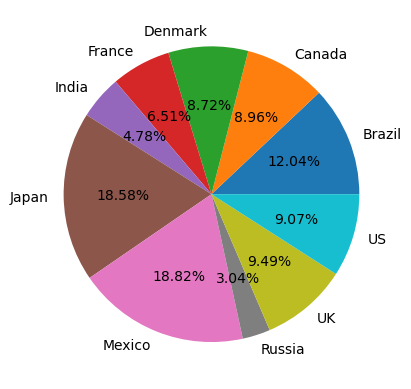

In [193]:
create_piechart(combined_df, 'view_count')

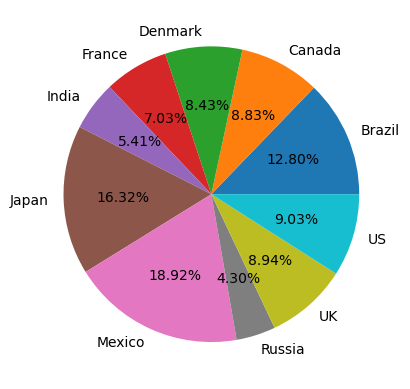

In [194]:
create_piechart(combined_df, 'likes')

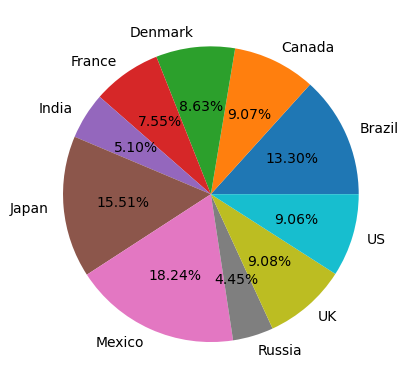

In [195]:
create_piechart(combined_df, 'comment_count')

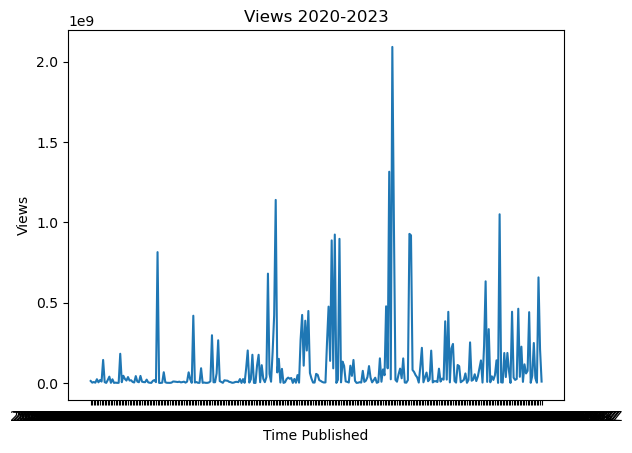

In [196]:
result_df = combined_df.groupby('publishedAt')['view_count'].sum().reset_index()
x = result_df['publishedAt']
y = result_df['view_count']
plt.plot(x, y)
plt.xlabel('Time Published')
plt.ylabel('Views')
plt.title('Views 2020-2023')
plt.show()

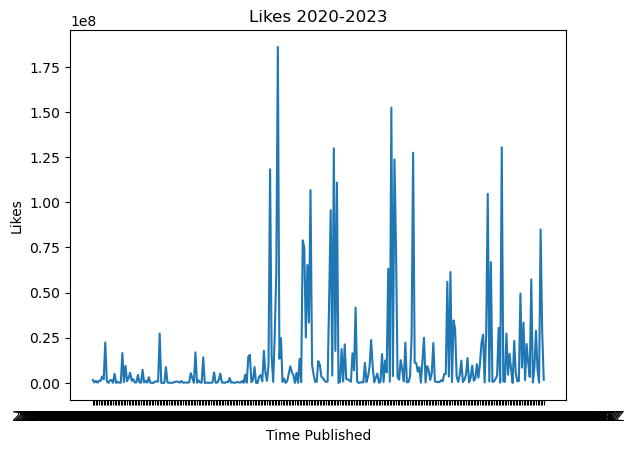

In [197]:
result_df = combined_df.groupby('publishedAt')['likes'].sum().reset_index()
x = result_df['publishedAt']
y = result_df['likes']
plt.plot(x, y)
plt.xlabel('Time Published')
plt.ylabel('Likes')
plt.title('Likes 2020-2023')
plt.show()

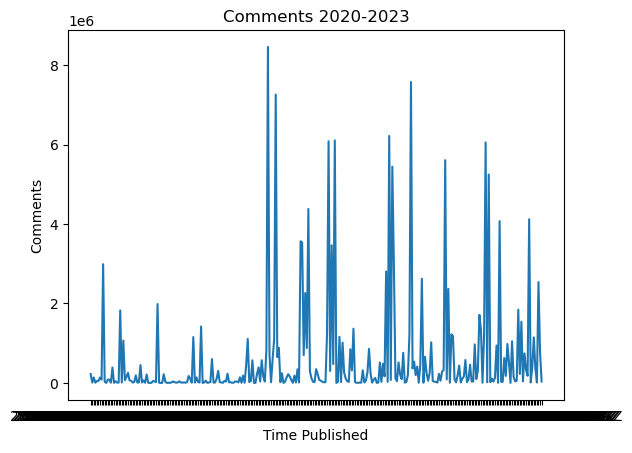

In [198]:
result_df = combined_df.groupby('publishedAt')['comment_count'].sum().reset_index()
x = result_df['publishedAt']
y = result_df['comment_count']
plt.plot(x, y)
plt.xlabel('Time Published')
plt.ylabel('Comments')
plt.title('Comments 2020-2023')
plt.show()

In [ ]:
## one with trending date? 